# Perceptron using Keras
In this, perceptrons are used to train a Linear Model with previously labelled data and classify the new data by predicting the probability of new point using keras.

In [1]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


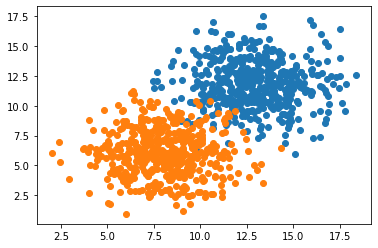

In [2]:
# Create two sets of points using numpy
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts), np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts), np.random.normal(6, 2, n_pts)]).T
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

In [3]:
# Define sequential model using Keras
model = Sequential()
# Add a perceptron with 2 input layers and one output layer using sigmoid as activation function
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
# Initialize Adam optimizer with learning rate 0.1
adam = Adam(lr=0.1)
# Define loss function and accuracy function for optimization
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
# Train model using the dataset we created
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=50, shuffle='true')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/50
1000/1000 [==============================] - 1s 645us/step - loss: 1.5455 - accuracy: 0.5380
Epoch 2/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.6582 - accuracy: 0.6030
Epoch 3/50
1000/1000 [==============================] - 0s 35us/step - loss: 0.4454 - accuracy: 0.8560
Epoch 4/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.3895 - accuracy: 0.8950
Epoch 5/50
1000/1000 [==============================] - 0s 28us/step - loss: 0.3462 - accuracy: 0.9050
Epoch 6/50
1000/1000 [==============================] - 0s 30us/step - loss: 0.3132 - accuracy: 0.9230
Epoch 7/50
1000/1000 [==============================] - 0s 31us/step - loss: 0.2940 - accuracy: 0.9320
Epoch 8/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.2658 - accuracy: 0.9390
Epoch 9/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.2

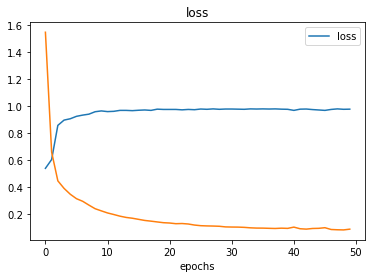

In [4]:
# Plot accuracy
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.legend(['accuracy'])

# Plot loss
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.legend(['loss'])

Prediction  [[0.9973093]]


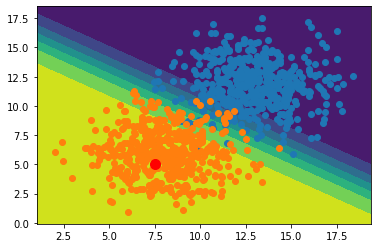

In [5]:
# Plot dataset points along with prediction contours
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
point = np.array([[7.5, 5.0]])
prediction = model.predict(point)
plt.plot([7.5], [5.0], marker='o', markersize=10, color='red')
print('Prediction ', prediction)